#Tarea 1

## Felipe Silva

###Pregunta 1:

Para el desarrollo de la pregunta 1, donde se pide el uso de la librería bnlearn para el desarrollo de y análisis de los métodos ExhaustiveSearch y HillclimbSearch.

Para esto, debemos cargar un dataset que posea 10000 filas como mínimo. Como se puede observar, se carga el dataset UltimateClassicRock.csv, donde se poseen mas de 15000 filas.

El funcionamiento del método ExhaustiveSearch se basa en un sistema de puntuación de todos los DAG posibles, y devuelve el Grafo o DAG con mayor putuación. Es por esto que para un dataset con una gran cantidad de datos, no es muy eficiente, ya que al buscar la gran cantidad de DAGs posibles a generarse con los datos, va a probocar tiempos demasiado largos de ejecución.

Para poder mitigar algo de tiempo de ejecución en este método, primero se va a limitar de manera random los datos del dataset a 10000. Luego se realiza una dicretización de datos para obtener una mayor eficiencia de análisis.

Luego, el funcionamiento del método HillClimbSearch, se basa en un enfoque de búsqueda heurística, la cual se puede utilizar si se usa una gran cantidad de nodos. Comienza una iteración desde el inicio del DAG, llegando al máximo de puntuación, donde finaliza al encontrar un máximo local.

El código a implementar es el siguiente:

In [13]:
import bnlearn as bn
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

dataset = pd.read_csv('UltimateClassicRock.csv')

#se convierte todo a segundos
def convert_duration(duration):
    minutes, seconds = duration.split(':')
    return int(minutes) * 60 + int(seconds)

dataset['Duration'] = dataset['Duration'].apply(convert_duration)

data_sample = dataset.sample(n=10000, random_state=42) #limitación de 10000 filas
print(data_sample.shape)

#dicretización de columnas
continuous_columns = ['Duration', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
                      'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity']

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

data_sample[continuous_columns] = discretizer.fit_transform(data_sample[continuous_columns])

print(data_sample[continuous_columns].head())

model_exhaustive = bn.structure_learning.fit(data_sample, methodtype='ex', scoretype='bic') #se aplica Exhaustivesearch (largo tiempo de ejecucion)

model_hillclimb = bn.structure_learning.fit(data_sample, methodtype='hc', scoretype='bic') #metodo Hillclimbsearch

#mostrar las estructuras obtenidas
print("Estructura obtenida con ExhaustiveSearch:", model_exhaustive['adjmat'])
print("Estructura obtenida con HillClimbSearch:", model_hillclimb['adjmat'])

model_exhaustive = bn.parameter_learning.fit(model_exhaustive, data_sample)
model_hillclimb = bn.parameter_learning.fit(model_hillclimb, data_sample)


#inferencias en la red de ExhaustiveSearch
query_exhaustive_1 = bn.inference.fit(model_exhaustive, variables=['Popularity'], evidence={'Danceability': 3})
query_exhaustive_2 = bn.inference.fit(model_exhaustive, variables=['Valence'], evidence={'Energy': 4})

print("Inferencias con el metodo ExhaustiveSearch\n")

print("Inf 1 (Predecir la popularidad de una canción dado su nivel de Danceability): ")
print(query_exhaustive_1)
print("Inf 2 (Predecir el Valence (estado emocional) de una canción dado su nivel de Energia): ")
print(query_exhaustive_2)

#inferencia en la red de HillClimbSearch
query_hillclimb_1 = bn.inference.fit(model_hillclimb, variables=['Popularity'], evidence={'Danceability': 3})
query_hillclimb_2 = bn.inference.fit(model_hillclimb, variables=['Valence'], evidence={'Energy': 4})

print("Inferencias con el metodo HillClimbSearch\n\n")

print("Inf 1 (Predecir la popularidad de una canción dado su nivel de Danceability): ")
print(query_hillclimb_1)
print("Inf 2 (Predecir el Valence (estado emocional) de una canción dado su nivel de Energia): ")
print(query_hillclimb_2)


(10000, 18)
       Duration  Danceability  Energy  Loudness  Speechiness  Acousticness  \
12879       0.0           2.0     4.0       4.0          0.0           0.0   
2807        0.0           2.0     4.0       4.0          0.0           0.0   
11136       0.0           2.0     4.0       4.0          0.0           0.0   
6400        0.0           3.0     3.0       3.0          0.0           0.0   
3014        0.0           4.0     2.0       3.0          0.0           3.0   

       Instrumentalness  Liveness  Valence  Tempo  Popularity  
12879               0.0       0.0      1.0    2.0         0.0  
2807                0.0       0.0      4.0    2.0         2.0  
11136               0.0       0.0      2.0    2.0         1.0  
6400                0.0       0.0      4.0    2.0         0.0  
3014                0.0       0.0      3.0    1.0         3.0  
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Warning: Structure learning with more then 15 nodes is computationally not feasable

KeyboardInterrupt: 

###Pregunta 2:

####A-
Para realizar esta actividad, se debe representar la cadena de markov, y definir las matrices necesarias. En este caso se va a definir la matriz de transición "T". Así se podrá conocer las trnasiciones entre estados.

Luego se debe realizar el randomWalk comenzando desde el grupo Yngwie Malmsteen (buen guitarrista). Así avanzando en cada iteración, donde se actualiza el cambio en las probabilidades de los distintos grupos, donde se van multiplicando el vector actual con la matriz de transición.


#### B -

Para poder determinar la distribución estacionaria de la cadena de Markov, se va a utilizar un metodo análitico para  `(P.T - I) * π = 0` con la restricción de que la suma de π es 1

Para esto, se realiza el siguiente código:



Iteración 1: [0.18 0.2  0.07 0.2  0.15 0.05 0.05 0.05 0.05]
Iteración 2: [0.1459 0.1173 0.0859 0.1923 0.09   0.0629 0.1424 0.0939 0.0694]
Iteración 3: [0.129182 0.104477 0.093147 0.175733 0.107083 0.07623  0.141869 0.096279
 0.076   ]
Iteración 4: [0.1301184  0.10520266 0.09486795 0.17154671 0.11045946 0.07796431
 0.13735631 0.0961726  0.0763116 ]
Iteración 5: [0.13139047 0.10546488 0.09483153 0.17113609 0.11019886 0.07759043
 0.13681097 0.09631164 0.07626513]
Iteración 6: [0.13161337 0.10542613 0.09476604 0.17111384 0.11006728 0.07747825
 0.13686983 0.09638749 0.07627778]
Iteración 7: [0.13162332 0.10540897 0.09475975 0.17109836 0.11006298 0.07747529
 0.13688272 0.09640256 0.07628606]
Iteración 8: [0.13162411 0.10540764 0.09476091 0.17109202 0.11006609 0.07747729
 0.13687994 0.09640435 0.07628765]


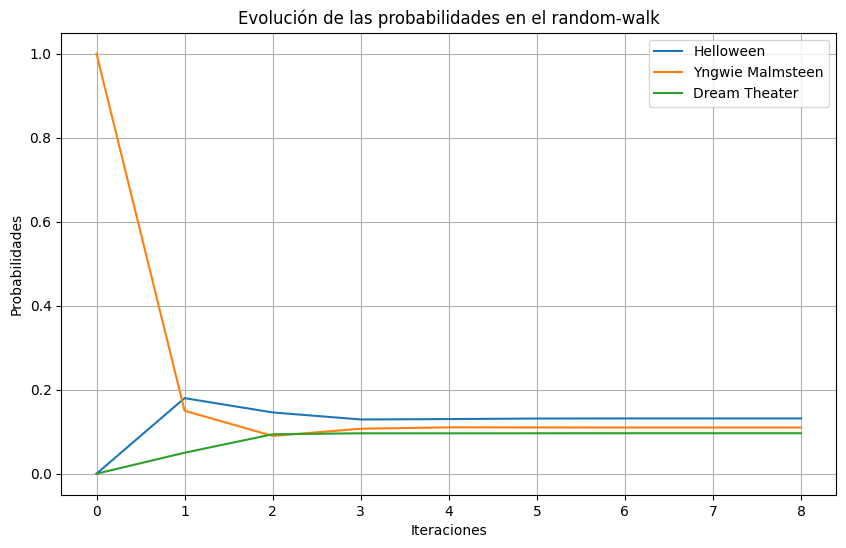

Probabilidades finales después de 8 iteraciones: [0.13162411 0.10540764 0.09476091 0.17109202 0.11006609 0.07747729
 0.13687994 0.09640435 0.07628765]

-----------------------------------------------------


Pregunta B

Distribución estacionaria analítica: [0.13162585 0.10540776 0.09476106 0.17109049 0.11006619 0.07747712
 0.13687884 0.09640483 0.07628785]
Suma de la distribución estacionaria: 1.0


In [12]:
import numpy as np
import matplotlib.pyplot as plt

#matriz T
grupos = ['Helloween', 'Hammerfall', 'Stratovarius', 'Rhapsody of Fire',
          'Yngwie Malmsteen', 'Liquid Tension Experiment',
          'Blind Guardian', 'Dream Theater', 'Symphony X']

transition = np.array([
    [0.25, 0.06, 0.08, 0.15, 0.04, 0.02, 0.15, 0.15, 0.10],
    [0.15, 0.15, 0.10, 0.22, 0.01, 0.02, 0.15, 0.10, 0.10],
    [0.12, 0.00, 0.05, 0.24, 0.14, 0.04, 0.27, 0.07, 0.07],
    [0.05, 0.13, 0.05, 0.30, 0.10, 0.10, 0.22, 0.05, 0.00],
    [0.18, 0.20, 0.07, 0.20, 0.15, 0.05, 0.05, 0.05, 0.05],
    [0.20, 0.10, 0.20, 0.05, 0.05, 0.10, 0.02, 0.15, 0.13],
    [0.01, 0.05, 0.15, 0.14, 0.17, 0.10, 0.12, 0.10, 0.16],
    [0.17, 0.15, 0.07, 0.07, 0.15, 0.10, 0.12, 0.09, 0.08],
    [0.13, 0.11, 0.13, 0.03, 0.20, 0.20, 0.04, 0.15, 0.01]
])

#RandomWalk
grupo_inicial = 4  # Yngwie Malmsteen
epsilon = 1e-5  # tolerancia para la convergencia

prob = np.zeros(9)
prob[grupo_inicial] = 1.0

prob_hist = [prob.copy()]
convergencia = False
i = 0

while not convergencia:
    i += 1
    new_prob = np.dot(prob, transition) #se multiplican

    if np.linalg.norm(new_prob - prob) < epsilon:
        convergencia = True

    prob = new_prob.copy()
    prob_hist.append(prob.copy())

    # Mostrar progreso en cada iteración
    print(f"Iteración {i}: {prob}")


prob_hist = np.array(prob_hist)

plt.figure(figsize=(10, 6))

#graficar
plt.plot(prob_hist[:, 0], label=grupos[0])  # Helloween (G1)
plt.plot(prob_hist[:, 4], label=grupos[4])  # Yngwie Malmsteen (G5)
plt.plot(prob_hist[:, 7], label=grupos[7])  # Dream Theater (G8)

plt.title("Evolución de las probabilidades en el random-walk")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidades")
plt.legend()
plt.grid(True)
plt.show()

# Paso 5: Análisis de los resultados
print(f"Probabilidades finales después de {i} iteraciones: {prob}")

####### PREGUNTA B #######

print("\n-----------------------------------------------------\n")

print("\nPregunta B\n")

m_t = transition.T #se transpone

#resolver el sistema de ecuaciones lineales (π * P = π)
n = m_t.shape[0]
A = np.vstack([m_t - np.eye(n), np.ones(n)])
b = np.zeros(n + 1)
b[-1] = 1  #la suma de π debe ser 1

distribucion_estacionaria = np.linalg.lstsq(A, b, rcond=None)[0]

print("Distribución estacionaria analítica:", distribucion_estacionaria)
print("Suma de la distribución estacionaria:", np.sum(distribucion_estacionaria))

De esta manera como se puede observar, el grafico muestra como las probabilidades iniciales se van distribuyendo en los otros grupos a medida se itera el random walk.


### Pregunta 3:



In [14]:
import numpy as np

# Definir las observaciones
observaciones = ['Satisfecho', 'Insatisfecho', 'Insatisfecho', 'Satisfecho', 'Insatisfecho', 'Insatisfecho', 'Insatisfecho', 'Insatisfecho', 'Satisfecho']

#observaciones (0: Satisfecho, 1: Insatisfecho)
observaciones_codificadas = [0, 1, 1, 0, 1, 1, 1, 1, 0]

estados = ['Ramen', 'Salmorejo', 'Cebolla']

trans_prob = np.array([[0.2, 0.6, 0.2],
                       [0.3, 0, 0.7],
                       [0.5, 0, 0.5]])


emission_prob = np.array([[0.8, 0.2],
                          [0.4, 0.6],
                          [0.5, 0.5]])


initial_prob = np.array([1/3, 1/3, 1/3])

# Viterbi
def viterbi(obs, estados, start_prob, trans_prob, emission_prob):
    n_obs = len(obs)
    n_states = len(estados)
    viterbi_table = np.zeros((n_states, n_obs))
    backpointer = np.zeros((n_states, n_obs), dtype=int)


    for s in range(n_states):
        viterbi_table[s, 0] = start_prob[s] * emission_prob[s, obs[0]]

    for t in range(1, n_obs):
        for s in range(n_states):
            trans_prob_list = [viterbi_table[prev_s, t-1] * trans_prob[prev_s, s] for prev_s in range(n_states)]
            max_prob = max(trans_prob_list)
            viterbi_table[s, t] = max_prob * emission_prob[s, obs[t]]
            backpointer[s, t] = np.argmax(trans_prob_list)


    best_path_prob = np.max(viterbi_table[:, -1])
    best_path_pointer = np.argmax(viterbi_table[:, -1])


    best_path = [best_path_pointer]
    for t in range(n_obs-1, 0, -1):
        best_path_pointer = backpointer[best_path_pointer, t]
        best_path.insert(0, best_path_pointer)

    return best_path, best_path_prob


best_path, best_path_prob = viterbi(observaciones_codificadas, estados, initial_prob, trans_prob, emission_prob)


best_path_estados = [estados[i] for i in best_path]

print("La secuencia más probable de estados ocultos es:", best_path_estados)
print("Con una probabilidad de:", best_path_prob)


print("El estado oculto más probable en q5 es:", best_path_estados[4])


La secuencia más probable de estados ocultos es: ['Ramen', 'Salmorejo', 'Cebolla', 'Ramen', 'Salmorejo', 'Cebolla', 'Cebolla', 'Cebolla', 'Ramen']
Con una probabilidad de: 4.2335999999999996e-05
El estado oculto más probable en q5 es: Salmorejo


Se aplica el algoritmo viterbi, donde nos devolvera una secuencia mas probable de estados ocultos, las probabilidades de transición y emisión. Así se puede determinar que la sopa mas probable que haya consumido es el Salmorejo. Pero para esto, se obtiene una secuencia más probable de estados ocultos.

Con este algoritmo segun la secuencia dada de observaciones, se puede determinar el estado oculto mas probable.